In [8]:
import networkx as nx
import math

# Vertex will be colored in red if that vertex represents cell with number 1 in it...
legend = {1: 'red', 2: 'green', 3: 'orange', 4: 'pink'}
S = [[3,4,1,0], 
     [0,2,0,0], 
     [0,0,2,0], 
     [0,1,4,3]]

In [9]:
G=nx.Graph()

# ADD NODES

nodes = []
counter = 1
for row in S:
    for cell in row:
        nodes.append(counter)
        counter += 1    
G.add_nodes_from(nodes)

# ADD EDGES

edges = []
N = int(math.sqrt(len(nodes)))

# Create subfield
scale = [] 
element = []
for i in range (N):
    element.append(i)
    if(len(element)==int(math.sqrt(N))):
        scale.append(element)
        element = []
subfield_def = {}
x = 0
for i in scale:
    for j in scale:
        subfield_def[x] = [i,j]
        x += 1
    
#  Check connection 
for index, cell in enumerate(nodes):  
    row = index // N
    column = index % N
    for key, value in subfield_def.items(): 
        if row in value[0] and column in value[1]:
            subfield = key
    
    for index_n, cell_n in enumerate(nodes):  
        row_n = index_n // N
        column_n = index_n % N
        for key, value in subfield_def.items(): 
            if row_n in value[0] and column_n in value[1]:
                subfield_n = key
        if((row == row_n or column == column_n or subfield == subfield_n) 
           and ((cell_n,cell)not in edges) and (cell != cell_n)):
            edges.append((cell,cell_n))
            
G.add_edges_from(edges)

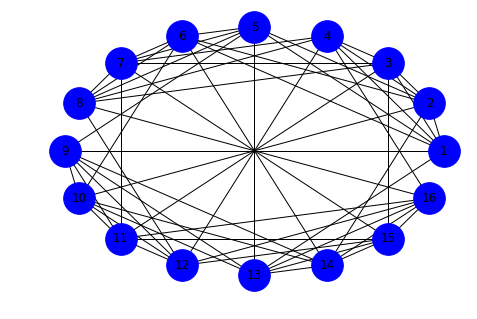

In [10]:
nx.draw_circular(G, with_labels = True, node_size=1000, node_color='b' )

In [11]:
# https://codereview.stackexchange.com/questions/203319/greedy-graph-coloring-in-python
def vertex_coloring_random_order(graph, color_map):
    for node in sorted(graph, key=lambda x: len(graph[x]), reverse=True):
        if node not in color_map:
            neighbor_colors = set(color_map.get(neigh) for neigh in graph[node])
            color_map[node] = next(color for color in range(1, N+1) if color not in neighbor_colors)
    return color_map

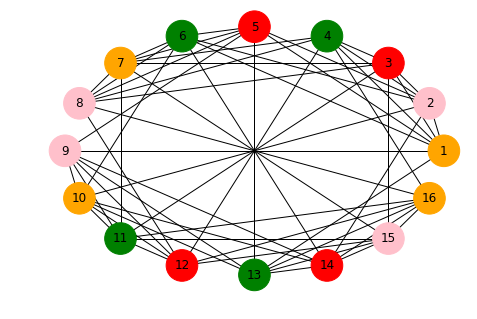

In [12]:
cell_number = 0
color_map = {}
color_map_real_color = []
 
# Color vertices that represent nonempty cells
for row in S:
    for cell in row:
        cell_number += 1
        if (cell != 0):
            color_map[cell_number] = cell
            
# Color vertices that represent empty cells
color_map = vertex_coloring_random_order(G, color_map)

# Join real color to the number according to legend
for node in G:
    color_map_real_color.append(legend[color_map[node]])
    
# Draw the graph
nx.draw_circular(G, node_color = color_map_real_color, with_labels = True, node_size=1000)


In [13]:
# Apply graph coloring to Sudoku
cell_number = 0
S_solved = []
for row in S:
    row_solved = []
    for cell in row:
        cell_number += 1
        row_solved.append(color_map[cell_number])
    S_solved.append(row_solved)
        
print (S_solved)

[[3, 4, 1, 2], [1, 2, 3, 4], [4, 3, 2, 1], [2, 1, 4, 3]]
